### Selecionando os dados de comandantes

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Função para buscar dados da API do Scryfall
def fetch_all_data(query):
    url = f"https://api.scryfall.com/cards/search?{query}"
    response = requests.get(url)
    if response.status_code != 200:
        return []

    data = response.json()
    cards = data['data']

    while data.get('has_more'):
        next_page_url = data['next_page']
        response = requests.get(next_page_url)
        if response.status_code != 200:
            break
        data = response.json()
        cards.extend(data['data'])

    return cards

# Buscar todas as cartas de comandante
# query = "q=is:commander"
query = "q=is:commander"

cards = fetch_all_data(query)

# Convertendo para DataFrame
df = pd.DataFrame(cards)

In [2]:
len(df)

2354

In [3]:
df['keywords']

0               [Venture into the dungeon]
1                           [Scry, Flying]
2       [Mark of Chaos Ascendant, Trample]
3                    [Choose a background]
4                      [Vigilance, Menace]
                       ...                
2349                       [Flying, Haste]
2350                                [Dash]
2351                               [Haste]
2352                              [Flying]
2353                                    []
Name: keywords, Length: 2354, dtype: object

In [4]:
df.columns

Index(['object', 'id', 'oracle_id', 'multiverse_ids', 'arena_id', 'name',
       'lang', 'released_at', 'uri', 'scryfall_uri', 'layout', 'highres_image',
       'image_status', 'image_uris', 'mana_cost', 'cmc', 'type_line',
       'oracle_text', 'power', 'toughness', 'colors', 'color_identity',
       'keywords', 'all_parts', 'legalities', 'games', 'reserved', 'foil',
       'nonfoil', 'finishes', 'oversized', 'promo', 'reprint', 'variation',
       'set_id', 'set', 'set_name', 'set_type', 'set_uri', 'set_search_uri',
       'scryfall_set_uri', 'rulings_uri', 'prints_search_uri',
       'collector_number', 'digital', 'rarity', 'card_back_id', 'artist',
       'artist_ids', 'illustration_id', 'border_color', 'frame',
       'security_stamp', 'full_art', 'textless', 'booster', 'story_spotlight',
       'promo_types', 'prices', 'related_uris', 'card_faces', 'mtgo_id',
       'tcgplayer_id', 'cardmarket_id', 'flavor_text', 'frame_effects',
       'edhrec_rank', 'purchase_uris', 'preview', 

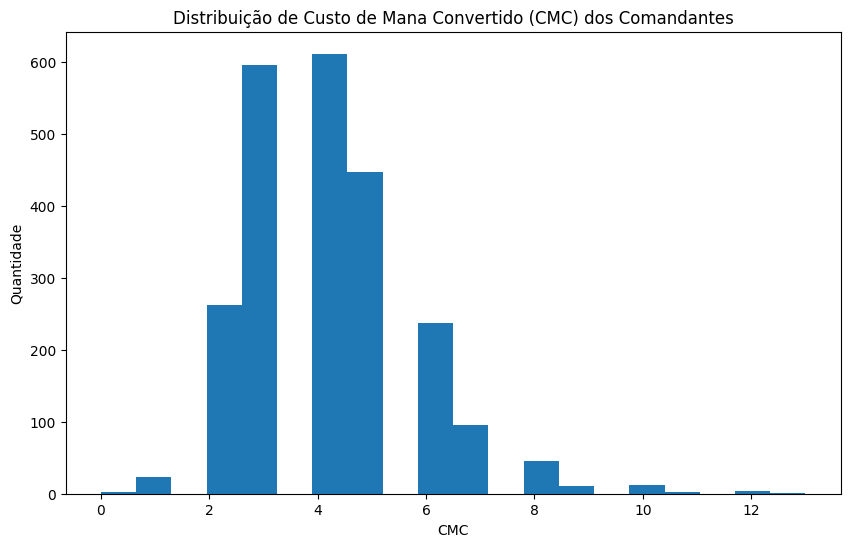

In [5]:
# Histograma para Distribuição de CMC
df['cmc'].plot(kind='hist', bins=20, figsize=(10, 6))
plt.title('Distribuição de Custo de Mana Convertido (CMC) dos Comandantes')
plt.xlabel('CMC')
plt.ylabel('Quantidade')
plt.show()



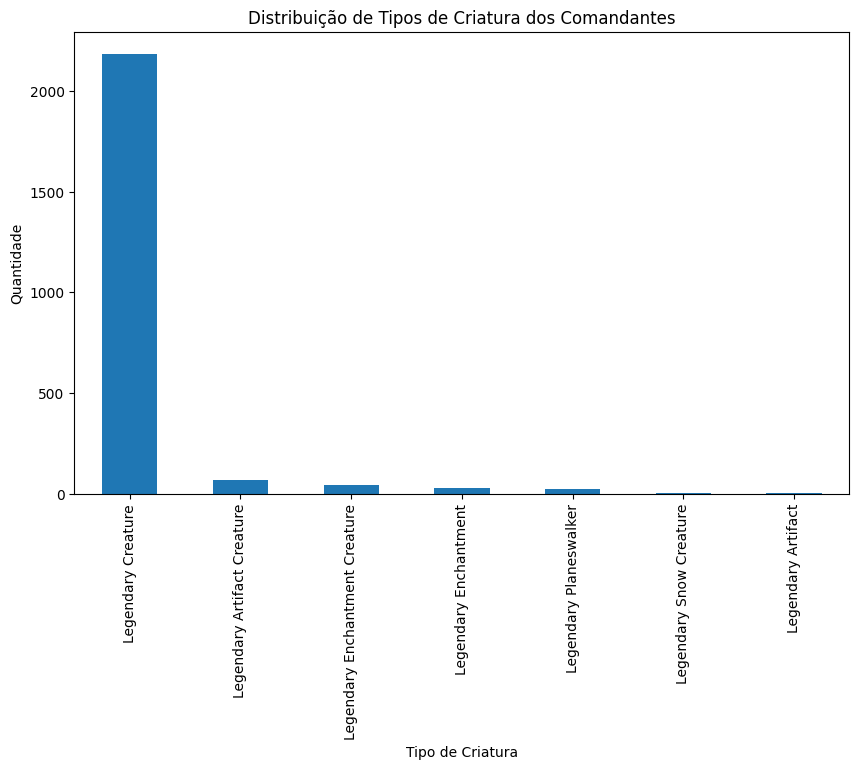

In [6]:
# # Gráfico de Barras para Tipos de Criatura
# df['main_type'] = df['type_line'].apply(lambda x: x.split('—')[0].strip())
# type_counts = df['main_type'].value_counts()
# type_counts.plot(kind='bar', figsize=(10, 6))
# plt.title('Distribuição de Tipos de Criatura dos Comandantes')
# plt.xlabel('Tipo de Criatura')
# plt.ylabel('Quantidade')
# plt.show()



In [7]:
df['type_line']

0                      Legendary Creature — Zombie Wizard
1       Legendary Creature — God // Legendary Creature...
2                   Legendary Creature — Astartes Warrior
3                      Legendary Creature — Human Warrior
4                         Legendary Creature — Elf Horror
                              ...                        
2349                      Legendary Creature — Orc Dragon
2350                     Legendary Creature — Orc Warrior
2351                     Legendary Creature — Orc Warrior
2352                    Legendary Creature — Human Wizard
2353                           Legendary Creature — Devil
Name: type_line, Length: 2354, dtype: object

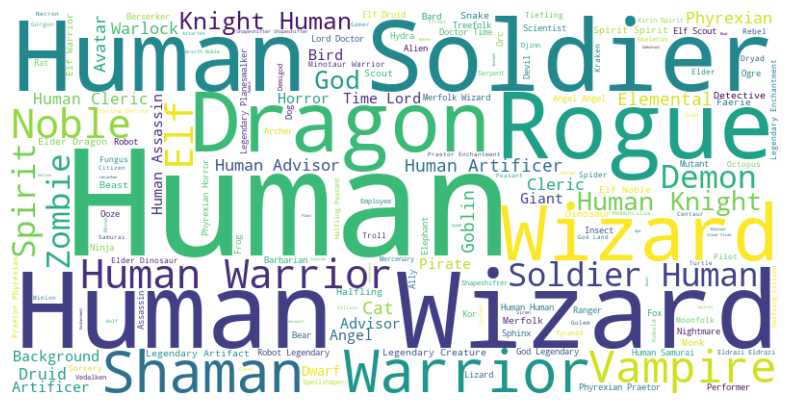

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Função para separar os tipos de criaturas
def split_types(type_line):
    parts = type_line.split('—')
    if len(parts) > 1:
        subtypes = parts[1].split('//')
        return [subtype.strip() for subtype in subtypes]
    return []

# Aplicar a função de separação e explodir a coluna resultante
df['subtypes'] = df['type_line'].apply(split_types)
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Supondo que df é seu DataFrame original
# Explodir a coluna 'subtypes'
df_exploded = df.explode('subtypes')

# Substituir NaNs por strings vazias
df_exploded['subtypes'] = df_exploded['subtypes'].fillna('')

# Converter todos os valores em 'subtypes' para strings
df_exploded['subtypes'] = df_exploded['subtypes'].astype(str)

# Gerar a string para a nuvem de palavras
all_subtypes = ' '.join(df_exploded['subtypes'])

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_subtypes)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [10]:
df_exploded

,object,id,oracle_id,multiverse_ids,arena_id,name,lang,released_at,uri,scryfall_uri,...,preview,mtgo_foil_id,penny_rank,produced_mana,watermark,loyalty,color_indicator,tcgplayer_etched_id,main_type,subtypes
0,card,eb363654-2004-4db8-bbd2-5b121da4f2a0,f0cc4b7d-3b52-4a16-8ae7-4e64a682e43d,[],77192.0,A-Acererak the Archlich,en,2021-07-23,https://api.scryfall.com/cards/eb363654-2004-4...,https://scryfall.com/card/afr/A-87/a-acererak-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Legendary Creature,Zombie Wizard
1,card,b443504e-1b25-4565-bad7-2575826c7bb9,2d6186a6-5236-4fb9-bcb6-f6825b148886,[],75077.0,"A-Alrund, God of the Cosmos // A-Hakka, Whispe...",en,2021-02-05,https://api.scryfall.com/cards/b443504e-1b25-4...,https://scryfall.com/card/khm/A-40/a-alrund-go...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Legendary Creature,God
1,card,b443504e-1b25-4565-bad7-2575826c7bb9,2d6186a6-5236-4fb9-bcb6-f6825b148886,[],75077.0,"A-Alrund, God of the Cosmos // A-Hakka, Whispe...",en,2021-02-05,https://api.scryfall.com/cards/b443504e-1b25-4...,https://scryfall.com/card/khm/A-40/a-alrund-go...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Legendary Creature,Legendary Creature
2,card,c9f1fc97-00c0-492b-a4a3-b179afc2f95d,8dedb9a7-0afa-4dff-b124-2344c170f11a,[],NaN,Abaddon the Despoiler,en,2022-10-07,https://api.scryfall.com/cards/c9f1fc97-00c0-4...,https://scryfall.com/card/40k/2/abaddon-the-de...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Legendary Creature,Astartes Warrior
3,card,396f9198-67b6-45d8-91b4-dc853bff9623,cab092f9-b7ff-43b9-935f-310869a4daf8,[562885],NaN,"Abdel Adrian, Gorion's Ward",en,2022-06-10,https://api.scryfall.com/cards/396f9198-67b6-4...,https://scryfall.com/card/clb/2/abdel-adrian-g...,...,"{'source': 'Wizards of the Coast', 'source_uri...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Legendary Creature,Human Warrior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,card,eacbcd82-36e6-424c-bd4e-ec3a584836c5,941c9acd-2773-456a-88d5-0537735f93c6,[607329],84565.0,Zurgo and Ojutai,en,2023-04-21,https://api.scryfall.com/cards/eacbcd82-36e6-4...,https://scryfall.com/card/mom/258/zurgo-and-oj...,...,NaN,NaN,5445.0,NaN,NaN,NaN,NaN,NaN,Legendary Creature,Orc Dragon
2350,card,bbac6d75-59ab-4d7d-87ae-46875abf8cc7,46808926-d95b-4313-89d1-6bdfe13fcb77,[394748],NaN,Zurgo Bellstriker,en,2015-03-27,https://api.scryfall.com/cards/bbac6d75-59ab-4...,https://scryfall.com/card/dtk/169/zurgo-bellst...,...,NaN,56051.0,459.0,NaN,kolaghan,NaN,NaN,NaN,Legendary Creature,Orc Warrior
2351,card,13f4bafe-0d21-47ba-8f16-0274107d618c,6c48d888-9f5d-43f4-adbd-61dbdba09260,[386731],58365.0,Zurgo Helmsmasher,en,2014-09-26,https://api.scryfall.com/cards/13f4bafe-0d21-4...,https://scryfall.com/card/ktk/214/zurgo-helmsm...,...,NaN,54251.0,10329.0,NaN,mardu,NaN,NaN,NaN,Legendary Creature,Orc Warrior
2352,card,561cfc04-65ea-49a4-8638-b4631a7cf828,d7950018-d744-48a8-81aa-0d8384703f48,[599080],NaN,Zur the Enchanter,en,2023-01-13,https://api.scryfall.com/cards/561cfc04-65ea-4...,https://scryfall.com/card/dmr/206/zur-the-ench...,...,NaN,NaN,4988.0,NaN,NaN,NaN,NaN,NaN,Legendary Creature,Human Wizard


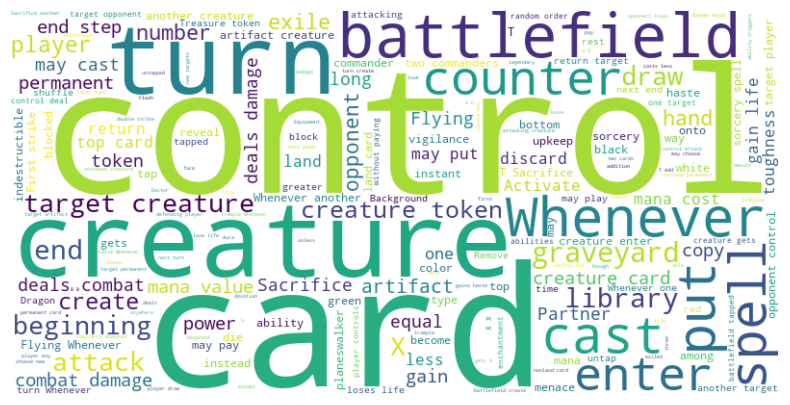

In [11]:
import seaborn as sns
from wordcloud import WordCloud
# Nuvem de Palavras para texto carta
all_text = ' '.join(df['oracle_text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

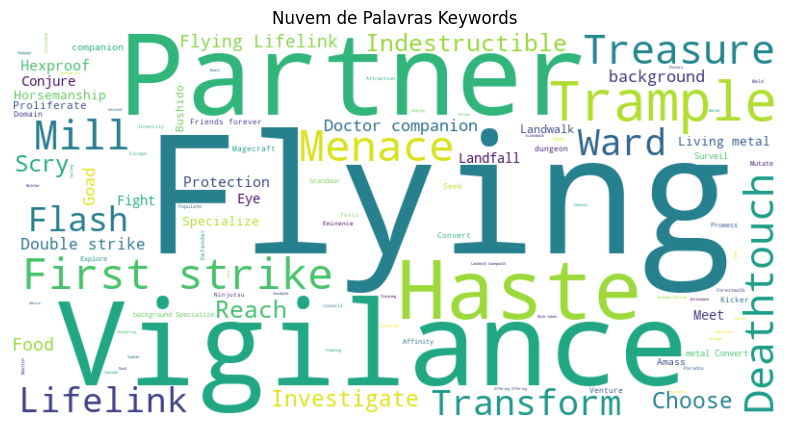

In [12]:


# Combinar todas as palavras-chave em uma única string para a nuvem de palavras combinada
all_keywords_combined = ' '.join([' '.join(keywords) for keywords in df['keywords']])

# Criar uma string com cada palavra-chave individualmente para a nuvem de palavras de módulos individuais
individual_keywords = ' '.join([keyword for keywords in df['keywords'] for keyword in keywords])

# Gerar a nuvem de palavras combinada
wordcloud_combined = WordCloud(width=800, height=400, background_color='white').generate(all_keywords_combined)

# # Gerar a nuvem de palavras individual
# wordcloud_individual = WordCloud(width=800, height=400, background_color='white').generate(individual_keywords)

# Plotar a nuvem de palavras combinada
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_combined, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras Keywords')
plt.show()

# # Plotar a nuvem de palavras individual
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud_individual, interpolation='bilinear')
# plt.axis('off')
# plt.title('Nuvem de Palavras Individual')
# plt.show()


In [15]:
from pyedhrec import EDHRec


edhrec = EDHRec()

# Reference cards by the exact card name, the library will format as needed
miirym = "Miirym, Sentinel Wyrm"

# Get basic card details
details = edhrec.get_card_details(miirym)

# Get details for a list of cards
card_list = edhrec.get_card_list(["Pongify", "Farseek"])

# Get an edhrec.com link for a given card
miirym_link = edhrec.get_card_link(miirym)

# Get combos for a card
miirym_combos = edhrec.get_card_combos(miirym)

# Get commander data 
miirym_commander_data = edhrec.get_commander_data(miirym)

# Get cards commonly associated with a commander
miirym_cards = edhrec.get_commander_cards(miirym)

# Get the average decklist for a commander
miirym_avg_deck = edhrec.get_commanders_average_deck(miirym)

# Get known deck lists for a commander
miirym_decks = edhrec.get_commander_decks(miirym)

# This library provides several methods to get specific types of recommended cards
new_cards = edhrec.get_new_cards(miirym)
high_synergy_cards = edhrec.get_high_synergy_cards(miirym)

# Get all top cards
top_cards = edhrec.get_top_cards(miirym)

# Get specific top cards by type
top_creatures = edhrec.get_top_creatures(miirym)
top_instants = edhrec.get_top_instants(miirym)
top_sorceries = edhrec.get_top_sorceries(miirym)
top_enchantments = edhrec.get_top_enchantments(miirym)
top_artifacts = edhrec.get_top_artifacts(miirym)
top_mana_artifacts = edhrec.get_top_mana_artifacts(miirym)
top_battles = edhrec.get_top_battles(miirym)
top_planeswalkers = edhrec.get_top_planeswalkers(miirym)
top_utility_lands = edhrec.get_top_utility_lands(miirym)
top_lands = edhrec.get_top_lands(miirym)

In [ ]:
top_creatures

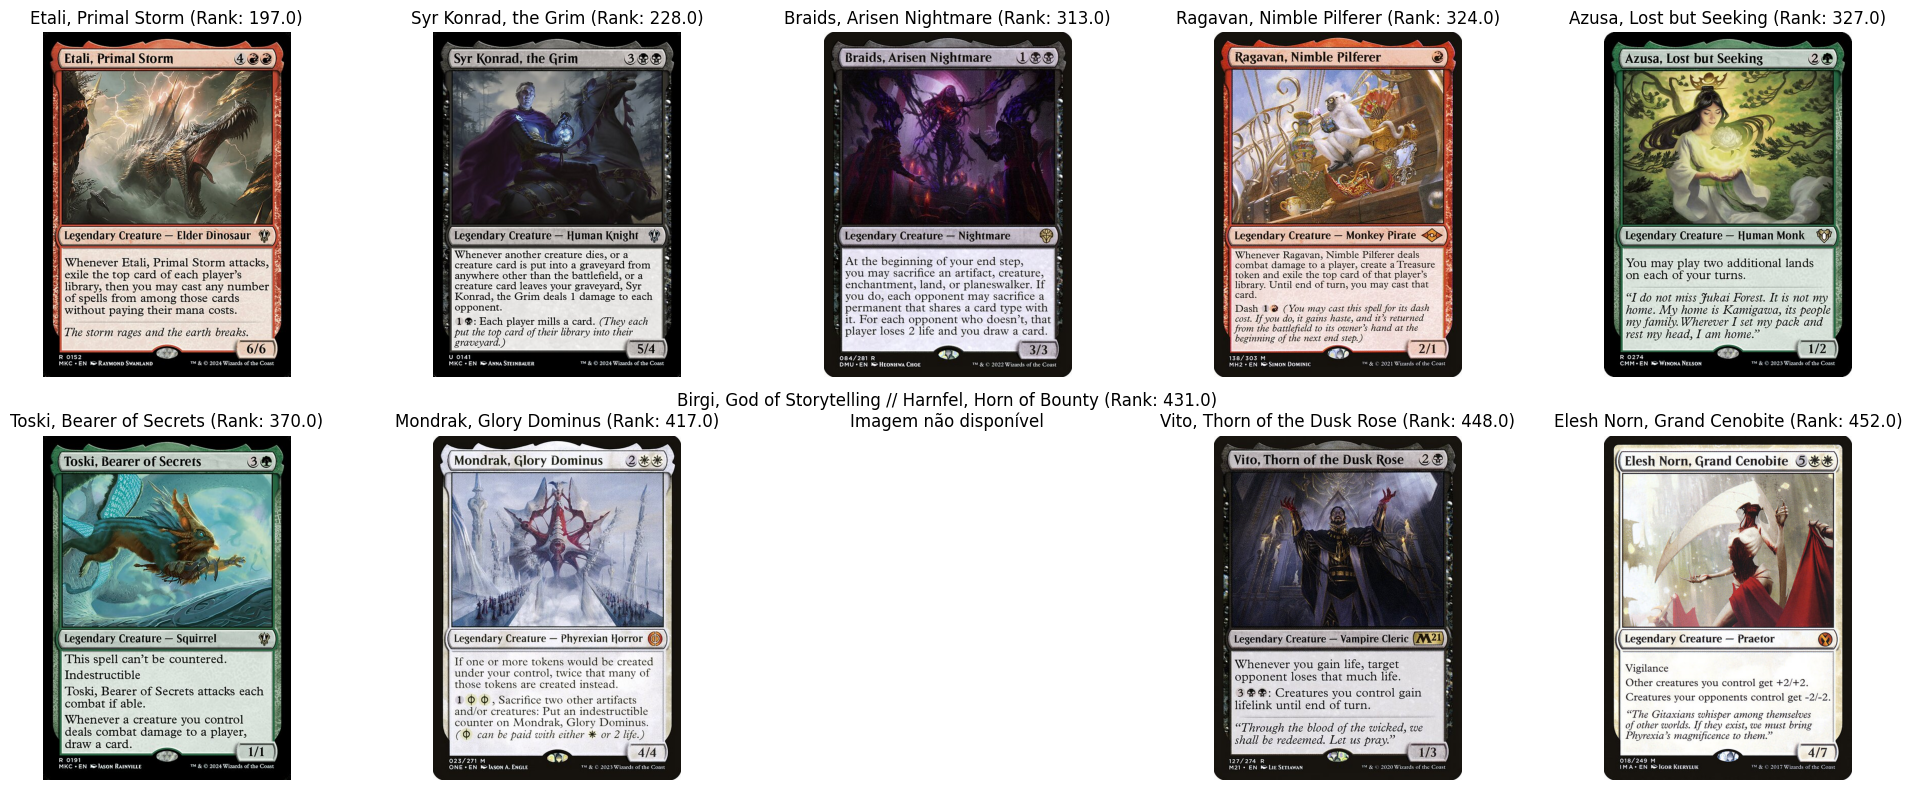

In [14]:
# Filtrar e ordenar pelo rank do EDHREC
df = df[df['edhrec_rank'].notnull()]  # Filtrar cartas sem rank EDHREC
df = df.sort_values('edhrec_rank').head(10)  # Top 10 cartas

# Mostrar imagens das cartas
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, (index, row) in enumerate(df.iterrows()):
    image_uris = row['image_uris']
    if isinstance(image_uris, dict):
        img_url = image_uris.get('normal')
        if img_url:
            response = requests.get(img_url)
            img = Image.open(BytesIO(response.content))
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(f"{row['name']} (Rank: {row['edhrec_rank']})", fontsize=12)
        else:
            axes[i].axis('off')
            axes[i].set_title(f"{row['name']} (Rank: {row['edhrec_rank']})\nImagem não disponível", fontsize=12)
    else:
        axes[i].axis('off')
        axes[i].set_title(f"{row['name']} (Rank: {row['edhrec_rank']})\nImagem não disponível", fontsize=12)

plt.tight_layout()
plt.show()

# Mostrar DataFrame dos top 10 comandantes
# df_top_10 = df[['name', 'edhrec_rank', 'image_uris']]
# print(df_top_10)

In [ ]:
edhrec_data